## COOKBOOK NOTEBOOK for GRAPHICAL ELEMENTS

1. shape, size and form <br>
2. translation, rotation <br>
3. color and transparency <br>
4. transformation <br>
5. data-driven <br>

In [6]:
# all the packages and modules we'll need for now. will import more later. 
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.patches as patches
from matplotlib import cm

import sys
sys.path.append('./modules/')
from importlib import reload
from IPython.display import HTML

%matplotlib inline

### (1) shape, size, form

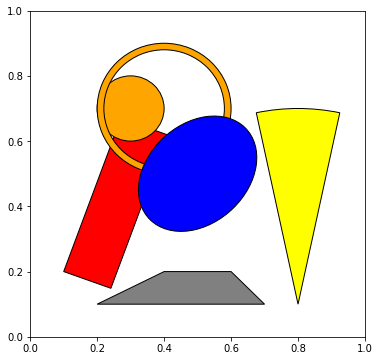

In [7]:
# matplotlib patches
# https://matplotlib.org/api/patches_api.html
# useful explanation of fig, axes, etc. 
# https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
    
fig, ax = plt.subplots(figsize=(6, 6))
#ax.add_axes([0,0,1,1])

# SHAPES

#rectangle
# xy = (left, bottom)
xy = (0.1,0.2)
width = 0.15
height = 0.5
angle = -20 
r1 = patches.Rectangle(xy, width, height, angle, facecolor='red', edgecolor='black')
ax.add_patch(r1)

# circle
# xy = (x_center, y_center)
xy = (0.3,0.7) 
c1 = patches.Circle(xy, radius=0.1, facecolor='orange', edgecolor='black')
ax.add_patch(c1)

# ring
# xy = (x_center, y_center)
xy = (0.4,0.7) 
ring1 = patches.Wedge(xy, r=0.2, theta1=0, theta2=360, width=0.02, facecolor='orange', edgecolor='black')
ax.add_patch(ring1)

# ellipse
xy = (0.5,0.5) 
width = 0.3
height = 0.4
e1 = patches.Ellipse(xy, width, height, angle=-45, facecolor='blue', edgecolor='black')
ax.add_patch(e1)

# wedge
center = (0.8,0.1)
ctheta = 90.0
dtheta = 12.0
r = 0.6
theta1 = ctheta-dtheta
theta2 = ctheta+dtheta
w1 = patches.Wedge(center, r, theta1, theta2, width=None, facecolor='yellow', edgecolor='black')
ax.add_patch(w1)

# polygon
xy = [[0.2,0.1],[0.7,0.1],[0.6,0.2],[0.4,0.2]]
p1 = patches.Polygon(xy, closed=True, facecolor='grey', edgecolor='black')
ax.add_patch(p1)

plt.show()

### (2) translation, rotation

(0.2, 0.1)
(0.26363636363636367, 0.15454545454545454)
(0.32727272727272727, 0.2090909090909091)
(0.3909090909090909, 0.26363636363636367)
(0.45454545454545453, 0.3181818181818182)
(0.5181818181818181, 0.3727272727272727)
(0.5818181818181818, 0.42727272727272725)
(0.6454545454545455, 0.4818181818181818)
(0.709090909090909, 0.5363636363636364)
(0.7727272727272727, 0.5909090909090909)
(0.8363636363636362, 0.6454545454545454)
(0.9, 0.7)


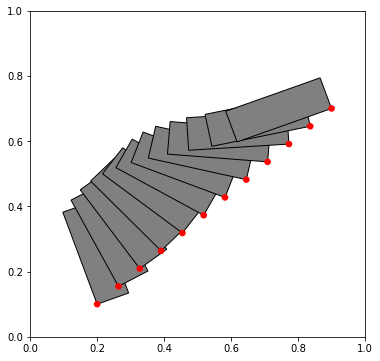

In [8]:
# STATIC 
# translation, rotation

fig, ax = plt.subplots(figsize=(6, 6))

# what do you want to vary? 
# just position
N = 12
x = np.linspace(0.2,0.9,N)
y = np.linspace(0.1,0.7,N)
#angle = np.linspace(0,0,N)
angle = np.linspace(20,110,N)

# constant values: 
height = 0.3
width = 0.1
patch_list = []
rdot_list = []

for x1, y1, deg in zip(x, y, angle):
    lefbot = (x1,y1)
    print(lefbot)
    patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
    patch_list.append(patch1)
    rdot_patch = patches.Circle(lefbot,0.01,fc='red')
    rdot_list.append(rdot_patch)
    
for padd in patch_list:
    ax.add_patch(padd)
for dot in rdot_list:
    ax.add_patch(dot)

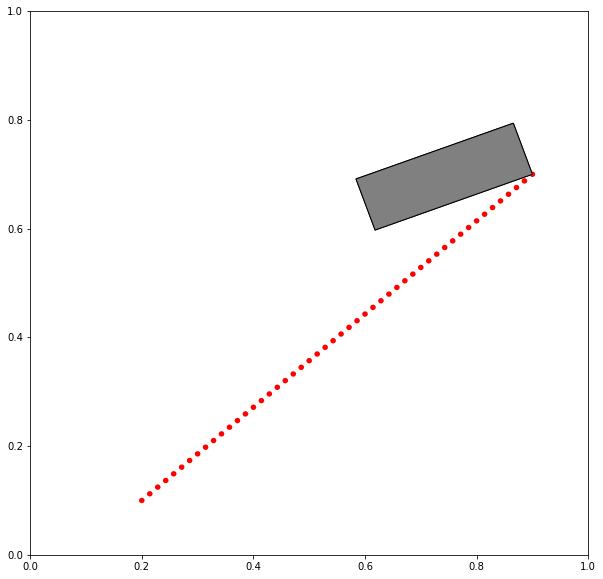

In [9]:
# ANIMATED !
import matplotlib.animation as animation

# translation, rotation

fig10, ax10 = plt.subplots(figsize=(10, 10))

# what do you want to vary? 
# just position
N = 50
x = np.linspace(0.2,0.9,N)
y = np.linspace(0.1,0.7,N)
#angle = np.linspace(0,0,N)
angle = np.linspace(20,110,N)

# constant values: 
height = 0.3
width = 0.1
patch_list = []
rdot_list = []

for x1, y1, deg in zip(x, y, angle):
    lefbot = (x1,y1)
    #print(lefbot)
    patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
    patch_list.append(patch1)
    rdot_patch = patches.Circle(lefbot,0.005,fc='red')
    rdot_list.append(rdot_patch)
    
for padd in patch_list:
    ax10.add_patch(padd)
for dot in rdot_list:
    ax10.add_patch(dot)
    
ims = []
rdot_list = []
for i in range(len(patch_list)):   
    padd = patch_list[i]
    im = ax10.add_patch(padd)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig10, ims, interval=50, blit=True) #,repeat_delay=1000)
HTML(ani.to_html5_video())
#ani.save('rotate_translate.mp4')

### (3) Color and transparency

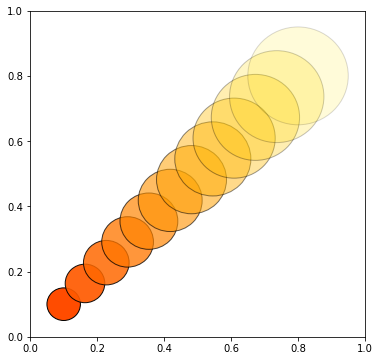

In [10]:
# color, transparency

fig, ax = plt.subplots(figsize=(6, 6))

# what do you want to vary? 
# just position
N = 12
x = np.linspace(0.1,0.8,N)
y = np.linspace(0.1,0.8,N)
radius = np.linspace(0.05,0.15,N)
alpha = np.linspace(1.0,0.15,N)

cval = np.linspace(0.3,0.9,N)
cmap = cm.autumn

# constant values: 

rdot_list = []

for x1, y1, rad, alf, c in zip(x, y, radius, alpha, cval):
    center = (x1,y1)
    col = cmap(c)
    d1 = patches.Circle(center, rad, alpha=alf, facecolor=col, edgecolor='black')
    rdot_list.append(d1)
    
for dot in rdot_list:
    ax.add_patch(dot)

### (4) transformation 

In [5]:
# SOOO... this is harder.. i didnt have time to figure it out, 
# but there are many ways to approach this.. i will get to it soon ! 

### (5) data-driven 

      hum  temp_C  time_s
0  30.516   26.78  0.0000
1  29.837   26.78  0.3760
2  29.124   26.79  0.7516
3  28.544   26.79  1.1273
4  28.341   26.80  1.5028
0.3817
317
120.9989
120.1999


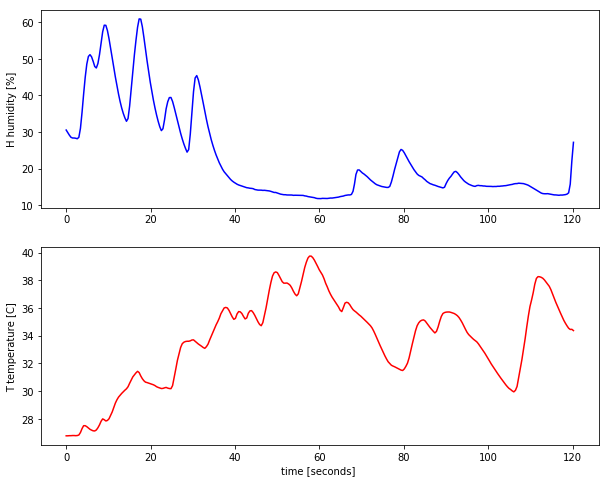

In [28]:
# READ IN THE DATA FILE ! ! !

#datafilename = '../0_data_examples/breathalyzer/BA_ben_1.pkl'
datafilename = '../0_data_nogit/pizzadevils_120s.pkl'
breath = pd.read_pickle(datafilename) # np.loadtxt(datafilename)
print(breath[0:5])
time = np.array(breath.time_s)
p1 = temp_C = np.array(breath.temp_C)
p2 = humidity = np.array(breath.hum)


dt =  time[-1]-time[-2]
print(dt)
print(len(time))
print(dt*len(time))
print(time[-1])

# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time,humidity,'b-')
#plt.xlabel('time')
plt.ylabel('H humidity [%]')

plt.subplot(2,1,2)
plt.plot(time,temp_C,'r-')
plt.xlabel('time [seconds] ')
plt.ylabel('T temperature [C]')

plt.show()

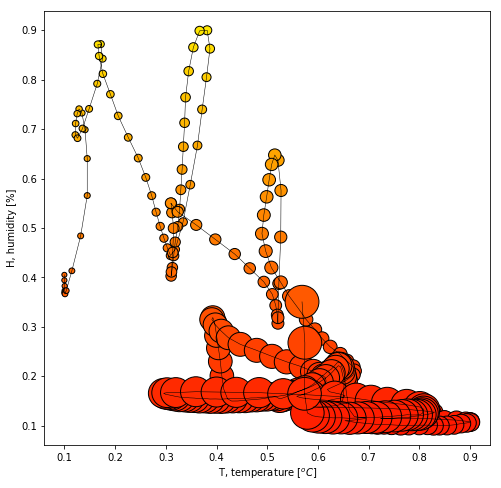

In [29]:
# tutorials on matplotlib patches: 

# ==================================================
# initialize the objects
fig = plt.figure(figsize=(8,8))
axes1 = plt.subplot(1,1,1) 
# when do you need an axes object? 

tempC_n = np.interp(temp_C,[min(temp_C),max(temp_C)],[0.1,0.9])
humidity_n = np.interp(humidity,[min(humidity),max(humidity)],[0.1,0.9])

axes1.plot(tempC_n,humidity_n,'k-', lw=0.5);
axes1.set_xlabel('T, temperature [$^o C$]')
axes1.set_ylabel('H, humidity [%]')

rad_vec = np.linspace(1/200,1/30,len(humidity_n))
humidity_n_vec = np.linspace(min(humidity_n),max(humidity_n),100)
cmap = cm.autumn

patch_list = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_list.append(patch1)

    
for padd in patch_list:
    axes1.add_patch(padd)





In [8]:
# ==========================================
# stuff to play with-- find when we need these scaling things... 
# here we are using the class above to scale the ellipse axes to the data so they are round dots. 
#dot1_width = GraphDist(rad_pix, axes1, True)
#dot1_height = GraphDist(rad_pix, axes1, False)
#dot2_width = GraphDist(rad_pix, axes2, True)
#dot2_height = GraphDist(rad_pix, axes2, False)

# patch2 = patches.Ellipse((time[0], temp_C[0]), dot2_width, dot2_height, fc='blue')

In [9]:
print(patch_list[34])

Circle((0.424812,0.793378),r=0.0124103)


# NOW ANIMATE THESE DOTS

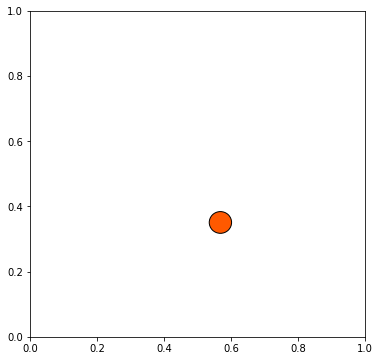

In [30]:
# https://matplotlib.org/gallery/animation/dynamic_image2.html
# ==================================================
# notice 

import matplotlib.animation as animation

patch_listA = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_listA.append(patch1)
    
fig9, ax9 = plt.subplots(figsize=(6, 6))
# put static image here

ims = []
for i in range(len(patch_list)):   
    padd = patch_listA[i]
    im = ax9.add_patch(padd)
    ims.append([im])

ani = animation.ArtistAnimation(fig9, ims, interval=50, blit=True) #,repeat_delay=1000)
ani.save('data_dots1.mp4')

## ADD A BACKGROUND IMAGE ! 
### Infinitely useful to us all ! 


474 720 4


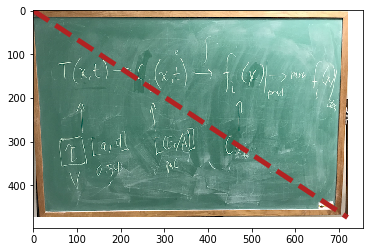

In [31]:
# https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python/34459284
# import matplotlib.image as mpimg (douglas doesn't use this)
%matplotlib inline

import matplotlib.image as mpimg

bg_image = '../0_data_examples/bboard.png'
img=mpimg.imread(bg_image)
sz_x,sz_y,col_depth = img.shape
print(sz_x,sz_y,col_depth)
# get pixel dimensions of the image: 
# The returned array has shape: 
# (M, N) for grayscale images.
# (M, N, 3) for RGB images.
# (M, N, 4) for RGBA images.



fig, ax = plt.subplots()
npts = 20
x = np.linspace(0,sz_x,npts) # make this read from image or be predefined and the image placed !
y = np.linspace(0,sz_y,npts)
ax.imshow(img) #, extent=[0, 400, 0, 300])
ax.plot(y,x, '--', linewidth=5, color='firebrick')

474 720 4


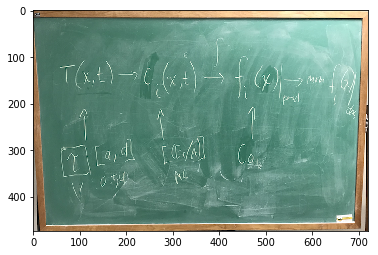

In [36]:
# add background to the movie above: 


# ==================================================
# read in the background image
bg_image = '../0_data_examples/bboard.png'
img=mpimg.imread(bg_image)
sz_x,sz_y,col_depth = img.shape
print(sz_x,sz_y,col_depth)

# ==================================================
# make the list of patch objects
patch_listA = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_listA.append(patch1)

    
# ==========================
# SETUP THE PLOT 
#fig10 = plt.figure(figsize=(6,6))
# axes1 = plt.subplot(1,1,1) 
 
fig11, ax11 = plt.subplots(figsize=(6, 6))

ims = []
for i in range(len(patch_list)):   
    padd = patch_listA[i]
    im = ax11.add_patch(padd)
    ims.append([im])

ani = animation.ArtistAnimation(fig11, ims, interval=50, blit=True) #,repeat_delay=1000)
ax11.imshow(img)
ani.save('datadots_bgimg.mp4', writer = 'ffmpeg', fps=30)
